In [19]:
import numpy as np

from qiskit import Aer
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.algorithms import Grover, AmplificationProblem

In [23]:
TAU = 2 * np.pi

In [46]:
value = np.array([1, 3, 6, 4, 2])
target = 6

In [53]:
N = len(value)
T = sum(value)
assert T >= target

In [48]:
n_value_qubits = np.ceil(np.log2(T))
n_sum_qubits = N + n_value_qubits

In [49]:
key = 2 ** (np.arange(N) + n_value_qubits)
key_value = (keys + value)
key_value_normed = key_value / (2 ** n_sum_qubits)

In [58]:
exp_sum = QuantumCircuit(N)
for i, kv in enumerate(key_value_normed):
    exp_sum.p(TAU * kv, i)
U = exp_sum.to_gate()

In [22]:
sum_reg = QuantumRegister(n_qubits_ft)
ancilla_reg = QuantumRegister(N)

In [17]:
sums_preparation = QuantumCircuit([sums_reg, ancilla_reg])
sums_preparation.h([sums_reg, ancilla_reg])

repetitions = 1
for v, sums_qubit in zip(vector, :
    for _ in range(repetitions):
        

9.0

In [15]:
np.log2(T)

4.0

In [4]:
bin(6)

'0b110'

In [13]:
oracle = Statevector.from_label(bin(6)[2:])

In [14]:
oracle

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


In [75]:
aer_simulator = Aer.get_backend('aer_simulator')

state preparation circuit:


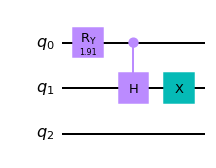

In [123]:
import numpy as np

# Specifying `state_preparation`
# to prepare a superposition of |01>, |10>, and |11>
oracle = QuantumCircuit(3)
oracle.ccx(0,1,2)

theta = 2 * np.arccos(1 / np.sqrt(3))
state_preparation = QuantumCircuit(3)
state_preparation.ry(theta, 0)
state_preparation.ch(0,1)
state_preparation.x(1)

# we only care about the first two bits being in state 1, thus add both possibilities for the last qubit
problem = AmplificationProblem(oracle, state_preparation=state_preparation, is_good_state=['110', '111'])

# state_preparation
print('state preparation circuit:')
problem.grover_operator.state_preparation.draw(output='mpl')

In [124]:
grover = Grover(quantum_instance=aer_simulator)
result = grover.amplify(problem)
print('Success!' if result.oracle_evaluation else 'Failure!')
print('Top measurement:', result.top_measurement)

Success!
Top measurement: 111


In [11]:
oracle = Statevector.from_label('11')
problem = AmplificationProblem(oracle)
grover = Grover(quantum_instance=aer_simulator)

In [28]:
oracle = Statevector.from_label('0000')
problem = AmplificationProblem(oracle)
problem.grover_operator.oracle.decompose().decompose().decompose().draw()

TypeError: object of type 'TextDrawing' has no len()

In [26]:
from qiskit.circuit.library import GroverOperator

In [36]:
oracle = Statevector.from_label('110')
oracle.data

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j])

In [55]:
import numpy as np

In [62]:
d = Diagonal((-1) ** np.array([0, 0, 0, 0, 0, 0, 1, 0]))#.decompose().decompose().decompose().draw()

In [64]:
len(d.decompose().decompose().decompose())

13

In [69]:
from qiskit.compiler import transpile

In [80]:
len(d)

1

In [82]:
def example_grover_iteration():
    """Small circuit with 5/16 solutions"""
    # Do circuit
    qc = QuantumCircuit(4)
    # Oracle
    qc.h([2,3])
    qc.ccx(0,1,2)
    qc.h(2)
    qc.x(2)
    qc.ccx(0,2,3)
    qc.x(2)
    qc.h(3)
    qc.x([1,3])
    qc.h(2)
    qc.mct([0,1,3],2)
    qc.x([1,3])
    qc.h(2)
    # Diffuser
    qc.h(range(3))
    qc.x(range(3))
    qc.z(3)
    qc.mct([0,1,2],3)
    qc.x(range(3))
    qc.h(range(3))
    qc.z(3)
    return qc

In [83]:
qc = example_grover_iteration()

In [86]:
qc = QuantumCircuit(2)

In [87]:
qc.cz(0, 1)

In [90]:
qc.decompose().draw()

q_0: ───────■───────
     ┌───┐┌─┴─┐┌───┐
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

In [85]:
qc.draw()

┌───┐┌───┐          ┌───┐┌───┐
q_0: ───────■──────────────■──────────────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├
            │  ┌───┐       │              │  ├───┤├───┤┌───┐  │  ├───┤├───┤
q_1: ───────■──┤ X ├───────┼──────────────■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├
     ┌───┐┌─┴─┐├───┤┌───┐  │  ┌───┐┌───┐┌─┴─┐├───┤├───┤├───┤  │  ├───┤├───┤
q_2: ┤ H ├┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├──■──┤ X ├┤ H ├
     ├───┤└───┘└───┘└───┘┌─┴─┐├───┤├───┤└─┬─┘├───┤├───┤└───┘┌─┴─┐├───┤└───┘
q_3: ┤ H ├───────────────┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ Z ├─────┤ X ├┤ Z ├─────
     └───┘               └───┘└───┘└───┘     └───┘└───┘     └───┘└───┘

In [81]:
d.depth()

1

In [37]:
from qiskit.circuit.library import Diagonal

In [38]:
from qiskit.circuit.library.phase_oracle import PhaseOracle

In [51]:
oracle = PhaseOracle('(a & b & c & d & e & f)')

In [52]:
len(oracle.decompose())

216

In [35]:
oracle = Statevector.from_label('110')
go = GroverOperator(oracle)
go.oracle.decompose().decompose().decompose().draw()

global phase: π/8
     ┌──────────┐┌───┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────┐┌───┐     »
q_0: ┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├─────»
     └──────────┘└─┬─┘└─────────┘└─┬─┘└──────────┘└─┬─┘├─────────┤└─┬─┘┌───┐»
q_1: ──────────────■───────────────┼────────────────■──┤ Rz(π/4) ├──┼──┤ X ├»
                                   │                   └─────────┘  │  └─┬─┘»
q_2: ──────────────────────────────■────────────────────────────────■────■──»
                                                                            »
«                                 
«q_0: ────────────────────────────
«     ┌──────────┐┌───┐           
«q_1: ┤ Rz(-π/4) ├┤ X ├───────────
«     └──────────┘└─┬─┘┌─────────┐
«q_2: ──────────────■──┤ Rz(π/4) ├
«                      └─────────┘

In [26]:
oracle = Statevector.from_label('110')
problem = AmplificationProblem(oracle)
problem.grover_operator.oracle.decompose().decompose().decompose().draw()

global phase: π/8
     ┌──────────┐┌───┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────┐┌───┐     »
q_0: ┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├─────»
     └──────────┘└─┬─┘└─────────┘└─┬─┘└──────────┘└─┬─┘├─────────┤└─┬─┘┌───┐»
q_1: ──────────────■───────────────┼────────────────■──┤ Rz(π/4) ├──┼──┤ X ├»
                                   │                   └─────────┘  │  └─┬─┘»
q_2: ──────────────────────────────■────────────────────────────────■────■──»
                                                                            »
«                                 
«q_0: ────────────────────────────
«     ┌──────────┐┌───┐           
«q_1: ┤ Rz(-π/4) ├┤ X ├───────────
«     └──────────┘└─┬─┘┌─────────┐
«q_2: ──────────────■──┤ Rz(π/4) ├
«                      └─────────┘

In [32]:
'0' * i

''

In [8]:
ls = []
for i in range(10):
    oracle = Statevector.from_label('0' * (i+1))
    problem = AmplificationProblem(oracle)
    ls.append(len(problem.grover_operator.oracle.decompose().decompose().decompose()))
    print(ls[-1])

1
5
13
29
61
125
253
509
1021
2045


In [24]:
ls = []
for i in range(13):
    qc = QuantumCircuit(i+2)
    qc.mcx(list(range(i+1)), i+1)
    ls.append(len(qc.decompose().decompose()))#.draw()
    print(ls[-1])

1
15
31
77
63
127
255
511
1023
2047
4095
8191
16383


In [13]:
ls = []
for i in range(10):
    qc = QuantumCircuit(i+2)
    qc.mcx(list(range(i+1)), i+1)
    ls.append(len(problem.grover_operator.oracle.decompose().decompose().decompose()))
    print(ls[-1])

2045
2045
2045
2045
2045
2045
2045
2045
2045
2045


In [5]:
import matplotlib.pyplot as plt

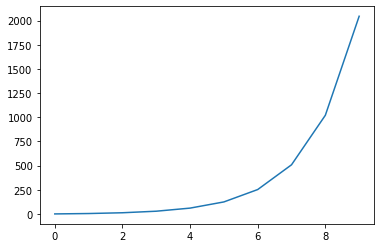

In [9]:
plt.plot(ls)

In [8]:
oracle = Statevector.from_label('11')

oracle

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


In [ ]:
qc = QuantumCircuit

In [1]:
import numpy as np
import matplotlib.pyplot as plt